# QMNIST classification and model analysis with confusion matrix

## QMNIST dataset
paper about QMNIST dataset: https://arxiv.org/pdf/1905.10498.pdf

## Outline:

1. Prepare your data

2. Print data

3. Create Linear classifier

4. Create Non-linear classifier

5. Train created models using QMNIST data

6. Visualize learned filters from Linear and Non-linear model

7. Report test accuracy of both models and analyze confusion matrices

## 1. Prepare your data

We have prepared the pickle file which can be downloaded using the link below.

The pickle file is a dict with the keys representing train / test data and labels.

It should be pretty similar to MNIST code we used in the lab.

In [1]:
# downloading code for you
! wget https://nyu.box.com/shared/static/4914fnt7z3obeupe9xyn7idzz9rsjg4x.pkl -O ./qmnist.pkl


--2020-03-13 09:23:57--  https://nyu.box.com/shared/static/4914fnt7z3obeupe9xyn7idzz9rsjg4x.pkl
Resolving nyu.box.com (nyu.box.com)... 107.152.26.197, 107.152.27.197
Connecting to nyu.box.com (nyu.box.com)|107.152.26.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/4914fnt7z3obeupe9xyn7idzz9rsjg4x.pkl [following]
--2020-03-13 09:23:58--  https://nyu.box.com/public/static/4914fnt7z3obeupe9xyn7idzz9rsjg4x.pkl
Reusing existing connection to nyu.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://nyu.app.box.com/public/static/4914fnt7z3obeupe9xyn7idzz9rsjg4x.pkl [following]
--2020-03-13 09:23:58--  https://nyu.app.box.com/public/static/4914fnt7z3obeupe9xyn7idzz9rsjg4x.pkl
Resolving nyu.app.box.com (nyu.app.box.com)... 107.152.27.199, 107.152.26.199
Connecting to nyu.app.box.com (nyu.app.box.com)|107.152.27.199|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: h

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix


In [2]:
# check the keys of the dict in pickle file
file_name = './qmnist.pkl'
mnist = pickle.load(open(file_name, "rb"))
for key in mnist:
    print(key)

# prepare your data
# put your code here...

train_data = mnist['train_data']
train_labels = mnist['train_labels']

test_data = mnist['test_data']
test_labels = mnist['test_labels']

train_data
train_labels
test_data
test_labels


## 2. Print data

Print five examples from the training part of QMNIST. Feel free to reuse the code from the lab

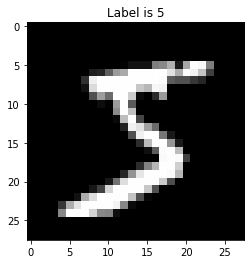

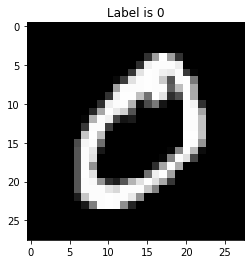

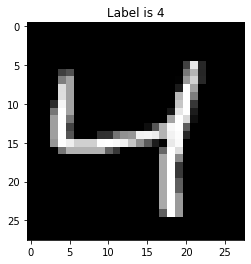

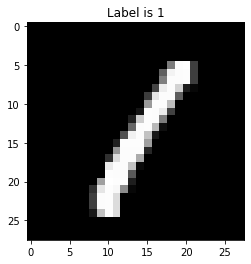

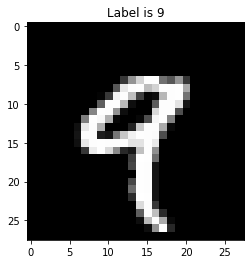

In [3]:
# code from this section derived from : https://stackoverflow.com/questions/37228371/visualize-mnist-dataset-using-opencv-or-matplotlib-pyplot
# NOTE WHEN RUNNING: sometime it takes running this cell twice for it to output the sample numbers

# put your code here ...
for i in range(5):
    pixels = train_data[i]
    pixels = np.array(pixels, dtype='uint8')
    
    # reshape array
    pixels = pixels.reshape((28, 28))
    
    plt.title('Label is {label}'.format(label=train_labels[i]))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    

## 3. Create *Linear* classfier using sklearn

Create a model with sklearn.


In [4]:
random_seed = 1

# define a model
model = LogisticRegression(tol=1e-3, solver = 'lbfgs', random_state = random_seed)


## 4. Create *Non-linear* classifier using sklearn

Create a model with sklearn. 

In [5]:
#define model
model2 = MLPClassifier(solver = 'sgd', learning_rate_init=.0001, hidden_layer_sizes=(784,), max_iter = 100, random_state = random_seed)



## 5. Train created models using QMNIST data

Train the model.

In [6]:
# do training for linear classified model
model.fit(train_data, train_labels)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)

In [7]:
# examine how well model scores on training data
s1 = model.score(train_data, train_labels)

print("Training-Set Analysis")
print(s1)

# do validation
s2 = model.score(test_data, test_labels)

print("Validation-Set Analysis")
print(s2)

Training-Set Analysis
0.92625
Validation-Set Analysis
0.91236


In [8]:
# do training for non-linear classifier model
model2.fit(train_data, train_labels)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(784,), learning_rate='constant',
              learning_rate_init=0.0001, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [9]:
# examine how well model scores on training data
s1 = model2.score(train_data, train_labels)

print("Training-Set Analysis")
print(s1)

# do validation
s2 = model2.score(test_data, test_labels)

print("Validation-Set Analysis")
print(s2)

Training-Set Analysis
1.0
Validation-Set Analysis
0.95492


Note that a 1.0 accuracy on training-set could potentially be a red flag for over fitting. However, since the validation set has an accuracy >90% the model is likely good.

## 6. Visualize learned filters from Linear and Non-linear model

Visualize filters (learned weights) similar to what you saw in lab. Sklearn docs have some examples of doing this for non-linear model. For non-linear model you can represent some rows from the first layer of the neural network (since there are more than 10 of such rows, you can use first 10 rows).

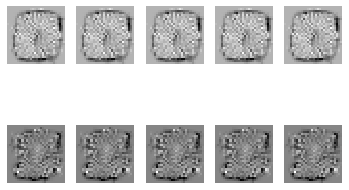

In [10]:
# visualization of linear model
fig, axes = plt.subplots(2, 5)

for i in range(2):
    for j in range(5):
        idx = j + i * 2
        axes[i, j].imshow(model.coef_[i].reshape(28,28), cmap = 'gray')
        axes[i, j].axis('off')
    
plt.show()

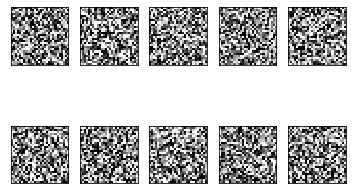

In [11]:
# visualization of non-linear model
fig, axes = plt.subplots(2, 5)

vmin, vmax = model2.coefs_[1].min(), model2.coefs_[1].max()
for c, x in zip(model2.coefs_[1].T, axes.ravel()):
    x.imshow(c.reshape(28, 28), cmap = plt.cm.gray, vmin = .5*vmin, vmax = .5 * vmax)
    x.set_xticks(())
    x.set_yticks(())
    #plt.getp(plt.title('title'))
    
plt.show()
    
    

## 7. Report test accuracy of both models and analyze confusion matrices

Get the accuracy.


For confusion matrix, use `sklearn.metrics.confusion_matrix`

Firstly, compute confusion matrix using your model and test data.

Then, given the defition:

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.


Estimate what is the most confusing pair (i -> j) of classes for you model (write code for that!).

You will notice that confusing pair usually has similar digits '' on average '' e.g. 1 and 7 or 7 and 9

In [12]:
# put your code here...
# examine how well model scores on training data
s1 = model.score(train_data, train_labels)

print("Training-Set Analysis")
print(s1)

# do validation
s2 = model.score(test_data, test_labels)

print("Validation-Set Analysis")
print(s2)



Training-Set Analysis
0.92625
Validation-Set Analysis
0.91236


In [13]:
# examine how well model scores on training data
s1 = model2.score(train_data, train_labels)

print("Training-Set Analysis")
print(s1)

# do validation
s2 = model2.score(test_data, test_labels)

print("Validation-Set Analysis")
print(s2)

Training-Set Analysis
1.0
Validation-Set Analysis
0.95492


#### Why does non-linear model give better performance?

The non-linear model is more flexible in how it can categorize data, and this flexibility allows it to handle more complex cases that a linear model might over-simplify because it is unable to do the additional calculations that would give these close to "border-line" cases more correct answers on average.

Side note: 1.0 accuracy on training-set could potentially be a red flag for over fitting. However, since the validation set has an accuracy >90% the model is likely good.

In [14]:
# confusion matrix for testing data using linear model

y_pred = model.predict(test_data)
c1 = confusion_matrix(test_labels, y_pred)

print(c1)


[[4811    1   19   16    7   29   36    4   39   10]
 [   1 5520   29    9    1    9   13    3   63    8]
 [  27   52 4432   80   39   29   76   42  198   19]
 [  20   19  155 4522    6  123   19   28  133   49]
 [  10   19   28   10 4431   12   50   15   39  184]
 [  63   33   24  176   49 3893   75   21  161   67]
 [  56   18   44    6   27   84 4721    0   42    1]
 [  11   22   62   16   47    6    0 4812   29  198]
 [  54  118   58  155   57  129   32   31 4187   95]
 [  35   19   28   71  166   32    2  125   59 4289]]


In [15]:
# find most confusing pair for linear model

max_i = 0;
max_j = 0;
max_conf = 0;

for i in range(10):
    for j in range(10):
        diff = c1[i][j]
        if (i != j):
            #print(i, j)
            if (diff > max_conf):
                max_conf = diff
                max_i = i
                max_j = j

print(max_i, max_j)
        


2 8


In [16]:
# confusion matrix for testing data using non-linear model

y_pred2 = model2.predict(test_data)
c2 = confusion_matrix(test_labels, y_pred2)

print(c2)


[[4819    3   15    7    3   27   46    5   31   16]
 [   2 5569   26   14    8    5    9   11    9    3]
 [  12   21 4770   47   19    4   19   39   54    9]
 [   7   16   67 4810    4   59    6   15   56   34]
 [  12   18   14    2 4583    3   25   26   19   96]
 [  25    8   12   83   10 4289   38   21   45   31]
 [  41    8   17    3   21   42 4830    1   35    1]
 [  12   14   37   23   26    7    1 4981   10   92]
 [  12   37   47   70   16   53   33   16 4564   68]
 [  17   12    7   43   74   24    5   64   49 4531]]


In [17]:
# find most confusing pair for non-linear model

max_i = 0;
max_j = 0;
max_conf = 0;

for i in range(10):
    for j in range(10):
        diff = c2[i][j]
        if (i != j):
            #print(i, j)
            if (diff > max_conf):
                max_conf = diff
                max_i = i
                max_j = j

print(max_i, max_j)


4 9


# MLP Classifier with another random seed

Train Non-linear model with a different initialization (make sure that random seed is different) and compare the most confusing pair with the first trained model. Is it different? Provide some argument why it can be different.

In [18]:
# define model
random_seed = 8
model3 = MLPClassifier(solver = 'sgd', learning_rate_init=.0001, hidden_layer_sizes=(784,), max_iter = 100, random_state = random_seed)


In [19]:
# fit the model to the data
model3.fit(train_data, train_labels)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(784,), learning_rate='constant',
              learning_rate_init=0.0001, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=8, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [20]:
# examine how well model scores on training data
s1 = model3.score(train_data, train_labels)

print("Training-Set Analysis")
print(s1)

# do validation
s2 = model3.score(test_data, test_labels)

print("Validation-Set Analysis")
print(s2)

Training-Set Analysis
1.0
Validation-Set Analysis
0.9539


In [21]:
# look at the confusion matrix

y_pred2 = model3.predict(test_data)
c3 = confusion_matrix(test_labels, y_pred2)

print(c3)


[[4833    1   14   10    7   22   38   10   27   10]
 [   2 5576   15    7    7    1    3   16   24    5]
 [  20   23 4746   42   20   12   16   41   58   16]
 [   6   12   60 4786    4   83    7   22   62   32]
 [  11   17   25    2 4572    9   18   32   16   96]
 [  17    7    5   76    8 4321   34   12   55   27]
 [  53    8   23    1   37   64 4777    5   29    2]
 [   8   11   44   27   40   10    2 4968   14   79]
 [  16   37   45   74   19   50   20   14 4584   57]
 [  17    8    6   26   85   34    1   71   46 4532]]


In [22]:
# find most confusing pair for new non-linear model

max_i = 0;
max_j = 0;
max_conf = 0;

for i in range(10):
    for j in range(10):
        diff = c3[i][j]
        if (i != j):
            #print(i, j)
            if (diff > max_conf):
                max_conf = diff
                max_i = i
                max_j = j

print(max_i, max_j)


4 9


In this case, using random_state = 1 and random_state = 8 both gave the same result that 4 and 9 were the most commonly confused pair (with 4s beign predicted as 9s). However, potentially if you have a start state that begins at a very different state, the model could be going to a different local minimum in its stochastic gradient descent.

# THE END
